# 9.4-2 (using networkx module)

The Wirehouse Lumber Company will soon begin logging eight groves of trees in the same general area. Therefore, it must develop a system of dirt roads that makes each grove accessible from every other grove. The distance (in miles) between every pair of groves is as follows: 
<br>
<br>

<div>
<img src="img_9.4-2_table.png" width="400"/>
</div>

Management now wishes to determine between which pairs of groves the roads should be constructed to connect all groves with a minimum total length of road.<br>

(a) Describe how this problem fits the network description of the minimum spanning tree problem. <br>
(b) Use the algorithm described in Sec. 9.4 to solve the problem.


In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import tree

In [315]:
# initalize data
df = pd.read_csv('data_arc.csv')

In [316]:
# remove any rows that are not connected
df = df[df['distance']!=0]

In [317]:
# check
df.head()

,u,v,distance
1,2,1,1.3
2,3,1,2.1
3,4,1,0.9
4,5,1,0.7
5,6,1,1.8


In [371]:
arcs = list((t[1], t[2]) for t in df.itertuples())
distance_dict = dict([((t[1], t[2]), t.distance) for t in df.itertuples()])

G = nx.Graph()

for x in arcs:
    i = x[0]
    j = x[1]
    weight = distance_dict[i,j]
    G.add_edge(i,j,weight = weight)


In [369]:
mst = tree.minimum_spanning_edges(G, algorithm='prim', data=False)
msp_edges = list(mst)
msp_edges
# sorted(sorted(e) for e in msp_edges)

[(1, 5), (5, 4), (5, 8), (8, 7), (7, 6), (8, 3), (3, 2)]

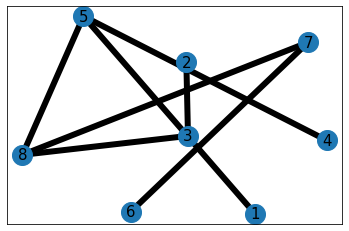

In [373]:
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=400)
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edgelist=msp_edges,width=6)

plt.savefig('test.png')

In [375]:
distance_lst = []
for x in msp_edges:
    i = x[0]
    j = x[1]
    weight = distance_dict[i,j]
    distance_lst.append(weight)
sum(distance_lst)


5.200000000000001